In [21]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [22]:
# Get constants
with open("params_train.json", 'r') as file:
    params = json.load(file)

agent_name      = params['training']['AGENT_NAME']
model_name      = params['training']['MODEL_NAME']
training_rounds = params['training']['TRAINING_ROUNDS']
scenario        = params['training']['SCENARIO']
old_model       = params['training']['START_TRAINING_WITH']

alpha  = params['Q-update']['ALPHA']
gamma  = params['Q-update']['GAMMA']
mode   = params['Q-update']['MODE']
n_step = params['Q-update']['N']


# Print training trivia
train_str = f"Trained 'agent_{agent_name}_{model_name}' in '{scenario}' for {training_rounds} rounds "
if old_model == "RESET":
    train_str += f"from scratch."
else:
    train_str += f"starting with '{old_model}'."
print(train_str)
print(f"Performed Q-update in {n_step}-step {mode} mode.  (alpha = {alpha}, gamma = {gamma})")

Trained 'agent_h4_coin-miner14' in 'loot-box' for 2000 rounds from scratch.
Performed Q-update in 5-step SARSA mode.  (alpha = 0.1, gamma = 1)


In [23]:
# All possible features
all_direction_features = np.array(
    [
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 1],
        [0, 1, 1, 1],
        [1, 1, 1, 1],
        [0, 0, 0, 2],
        [0, 0, 1, 2],
        [0, 1, 1, 2],
        [1, 1, 1, 2],
        [0, 0, 2, 2],
        [0, 1, 2, 2],
        [1, 1, 2, 2],
        [0, 2, 2, 2],
        [1, 2, 2, 2],
        [2, 2, 2, 2],   
    ]
)
all_own_spot_features  = np.array([0, 1, 2])
all_mode_features      = np.array([0, 1, 2])  

### Evaluating the trained model

In [24]:
trained_model = np.load(f"model_{agent_name}_{model_name}.npy")
Sa_counter    = np.load(f"sa_counter_{agent_name}_{model_name}.npy")
policy        = np.argmax(trained_model, axis = -1)

In [25]:
def look_up_q_tensor(f5 = 1):
    print(f"Q-Tensor for case (f5 = {f5}):")
    print(f"state  direction features   policy  trained model  {'':20}number of encounters")
    for i in range(len(all_direction_features)):
        line = f"{i:2}{'':2}{all_direction_features[i]} {[f5]}{'':2}{policy[i, f5]}{'':2}["
        for Q_value in trained_model[i, f5]:
            line += f"{Q_value:-7.1f}"
        line += f"]  {np.sum(Sa_counter[i, f5]):5} ["
        for count in Sa_counter[i, f5]:
            line += f" {count:5}"
        line += f"]"
        print(line)

In [26]:
look_up_q_tensor(f5 = 0)

Q-Tensor for case (f5 = 0):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [0]  4  [   -7.5   -7.4   -7.6   -7.4   -7.4   -7.5]   2358 [   181   188   164   188  1499   138]
 1  [0 0 0 1] [0]  3  [   -4.7   -5.9   -4.4   72.7   -5.3   -5.0]   2030 [    50    39    58  1805    41    37]
 2  [0 0 1 1] [0]  2  [   -0.6   -1.3   73.2    4.1   -0.7   -1.6]    305 [     6     3   274     6     6    10]
 3  [0 1 1 1] [0]  3  [    0.0    0.0    0.0    0.7    0.0    0.0]      1 [     0     0     0     1     0     0]
 4  [1 1 1 1] [0]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 5  [0 0 0 2] [0]  3  [   -8.1   -8.0   -8.2   73.9   -7.2   -8.0]   6301 [   108   107   113  5756   113   104]
 6  [0 0 1 2] [0]  3  [   -3.2   -1.0    9.2   70.5   -2.5   -3.3]    725 [    10     6    13   674    14     8]
 7  [0 1 1 2] [0]  2  [   -0.2    0.0   50.8    0.9    0.0    0.0]     66 [     2     0  

In [27]:
look_up_q_tensor(f5 = 1)

Q-Tensor for case (f5 = 1):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [1]  4  [   12.5    6.1   14.6    9.4   74.5   18.5]   1932 [    37    49    40    35  1734    37]
 1  [0 0 0 1] [1]  3  [    7.8    4.0   23.0   72.4   31.7   40.9]   2395 [    42    52    45  2154    49    53]
 2  [0 0 1 1] [1]  3  [    3.5   -0.0    0.4   68.9    0.4    2.5]    483 [    13    11     4   438    11     6]
 3  [0 1 1 1] [1]  1  [   -0.7   71.3    5.4   11.9    8.4   24.2]   1019 [     5   976     5    15     4    14]
 4  [1 1 1 1] [1]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 5  [0 0 0 2] [1]  3  [   60.0   55.9   57.0   73.4   61.4   59.8]  70554 [  2424  1524   688 53078 11492  1348]
 6  [0 0 1 2] [1]  3  [   59.4   65.9   62.7   74.4   67.1   57.8]  164264 [  7658  4919 55485 49644 45044  1514]
 7  [0 1 1 2] [1]  3  [   38.6   59.3   58.0   74.5   58.5   54.7]  27220 [   262   614 

In [28]:
look_up_q_tensor(f5 = 2)

Q-Tensor for case (f5 = 2):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [2]  4  [   17.9    7.6    9.0    8.7   73.6    4.7]   1289 [    32    28    27    33  1137    32]
 1  [0 0 0 1] [2]  5  [   21.1   35.1   26.5   34.7   35.4   68.5]   4902 [   154   139   152   289   305  3863]
 2  [0 0 1 1] [2]  5  [   32.1   39.8   35.9   41.1   36.7   72.5]   8399 [   154   158   757  2649   308  4373]
 3  [0 1 1 1] [2]  5  [   29.7   22.6   22.8   20.4   33.2   70.3]   2254 [    57   229    36    24    54  1854]
 4  [1 1 1 1] [2]  5  [   -0.8    1.9   -0.1   -0.4    3.6   70.2]    287 [     3    24    10     4     8   238]
 5  [0 0 0 2] [2]  5  [   -0.1   -0.2   -0.5   -0.0   -0.3   40.9]     30 [     1     1     1     2     1    24]
 6  [0 0 1 2] [2]  5  [    0.4    0.4    0.3    0.0    5.3   38.5]    149 [     1     1     2     0   131    14]
 7  [0 1 1 2] [2]  5  [    0.0    0.0    0.0    0.0    0.0    9.5]      3 [     0     0  

## Looking at the training process

### Training performance over rounds

In [29]:
def moving_average (x, w):
    """
    from https://newbedev.com/how-to-calculate-rolling-moving-average-using-numpy-scipy
    """
    return np.convolve(x, np.ones(w), 'valid') / w

In [30]:
with open("results_train.json", 'r') as file:
    training_results = json.load(file)

In [31]:
number_of_rounds = training_results['by_agent'][f"agent_{agent_name}"]['rounds']
round_list       = list(training_results['by_round'])
rounds           = np.arange(number_of_rounds) + 1
collected_coins  = np.zeros(number_of_rounds, dtype = int)
round_lengths    = np.zeros(number_of_rounds, dtype = int)
kills            = np.zeros(number_of_rounds, dtype = int)
suicides         = np.zeros(number_of_rounds, dtype = int)
died             = np.zeros(number_of_rounds, dtype = int)
invalid_moves    = np.zeros(number_of_rounds, dtype = int)

for round_name in round_list:
    round_dict             = training_results['by_round'][round_name]
    round                  = round_dict['round'] - 1   # round index
    collected_coins[round] = round_dict['coins'][0]
    round_lengths[round]   = round_dict['steps']
    kills[round]           = round_dict['kills'][0]
    suicides[round]        = round_dict['suicides'][0]
    died[round]            = round_dict['got killed'][0]
    invalid_moves[round]   = round_dict['invalid'][0]


In [32]:
survived        = 1 - died
was_killed      = died - suicides
steps_survived  = np.where(died, round_lengths, 400)

In [33]:
avg_length   = 50   # number of rounds to average over

kill_rate           = moving_average(kills, avg_length)
suicide_rate        = moving_average(suicides, avg_length)
was_killed_rate     = moving_average(was_killed, avg_length)
died_rate           = moving_average(died, avg_length)
steps_survived_rate = moving_average(steps_survived, avg_length)


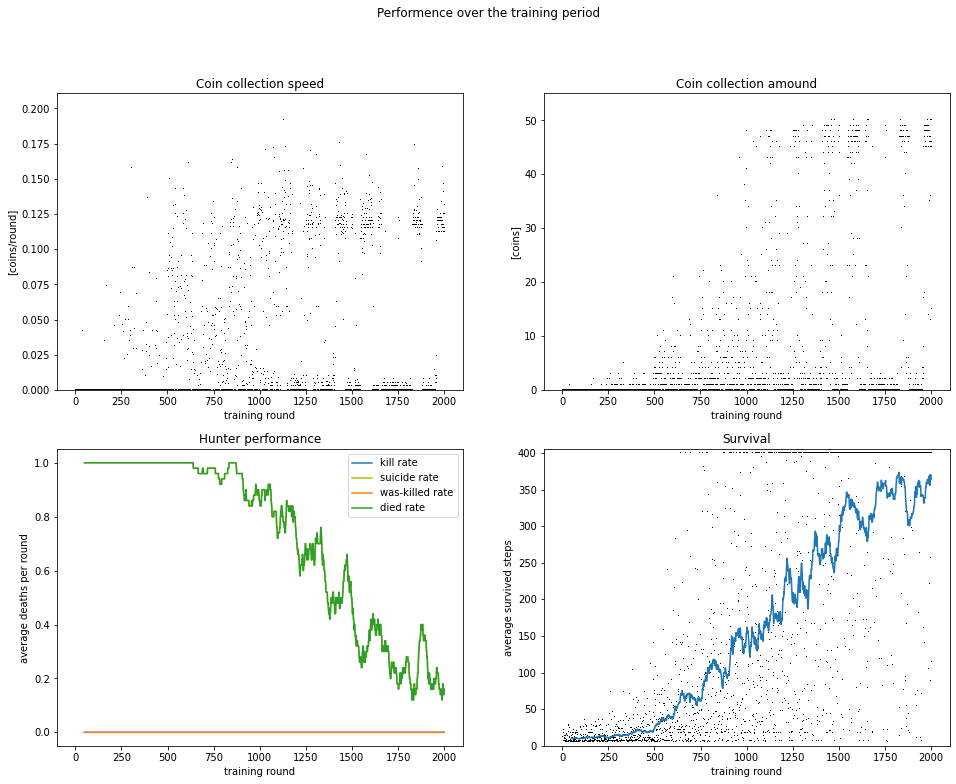

In [34]:
plt.figure(figsize = (16,12))
plt.suptitle("Performence over the training period")

plt.subplot(2, 2, 1)
speed = collected_coins / round_lengths
plt.plot(rounds, speed, ',k')
plt.ylim((0, 1.1*max(speed)))
plt.title("Coin collection speed")
plt.ylabel("[coins/round]")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.subplot(2, 2, 2)
plt.plot(rounds, collected_coins, ',k')
plt.ylim((0, 1.1*max(collected_coins)))
plt.title("Coin collection amound")
plt.ylabel("[coins]")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.subplot(2, 2, 3)
plt.plot(rounds[avg_length-1:], kill_rate, label = "kill rate")
plt.plot(rounds[avg_length-1:], suicide_rate, 'y', label = "suicide rate")
plt.plot(rounds[avg_length-1:], was_killed_rate, label = "was-killed rate")
plt.plot(rounds[avg_length-1:], died_rate, label = "died rate")
plt.xlim(-0.05*number_of_rounds, 1.05*number_of_rounds)
plt.title("Hunter performance")
plt.ylabel("average deaths per round")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(rounds, steps_survived, ',k')
plt.plot(rounds[avg_length-1:], steps_survived_rate)
plt.ylim(0, 405)
plt.xlim(-0.05*number_of_rounds, 1.05*number_of_rounds)
plt.title("Survival")
plt.ylabel("average survived steps")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.show()



In [35]:
def analyze_action():
    title_str = "Evolution of actions"
    
    Q_action = np.mean(allQs, axis = (1,2))
    labels  = ["action 0", "action 1", "action 2", "action 3", "WAIT", "BOMB"]

    plt.plot(np.arange(number_of_rounds) + 1, Q_action, label = labels)
    plt.title(title_str)
    plt.ylabel("Mean Q-value")
    plt.xlabel("training round")
    plt.legend()
    plt.show()

In [36]:
def analyze_state (state):
    state_index, f5 = state
    Q_state = allQs[:, state_index, f5]
    labels  = ["action 0", "action 1", "action 2", "action 3", "WAIT", "BOMB"]

    plt.plot(np.arange(training_rounds) + 1, Q_state, label = labels)
    plt.title(f"Evolution of policies in state {state}")
    plt.ylabel("Q-value")
    plt.xlabel("training round")
    plt.legend()
    plt.show()

### Evolution of the Q-model

In [37]:
allQs = np.load("Qtrain.npy")

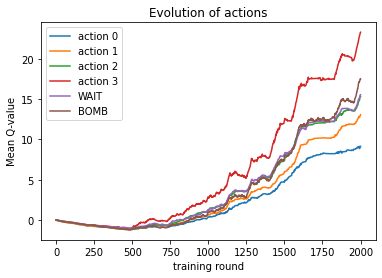

In [38]:
analyze_action()

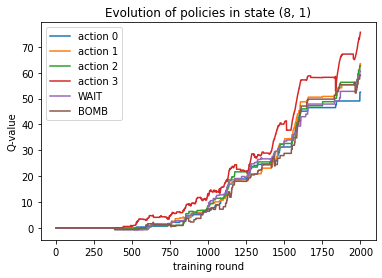

In [39]:
analyze_state((8, 1))

In [40]:
look_up_q_tensor(0)

Q-Tensor for case (f5 = 0):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [0]  4  [   -7.5   -7.4   -7.6   -7.4   -7.4   -7.5]   2358 [   181   188   164   188  1499   138]
 1  [0 0 0 1] [0]  3  [   -4.7   -5.9   -4.4   72.7   -5.3   -5.0]   2030 [    50    39    58  1805    41    37]
 2  [0 0 1 1] [0]  2  [   -0.6   -1.3   73.2    4.1   -0.7   -1.6]    305 [     6     3   274     6     6    10]
 3  [0 1 1 1] [0]  3  [    0.0    0.0    0.0    0.7    0.0    0.0]      1 [     0     0     0     1     0     0]
 4  [1 1 1 1] [0]  0  [    0.0    0.0    0.0    0.0    0.0    0.0]      0 [     0     0     0     0     0     0]
 5  [0 0 0 2] [0]  3  [   -8.1   -8.0   -8.2   73.9   -7.2   -8.0]   6301 [   108   107   113  5756   113   104]
 6  [0 0 1 2] [0]  3  [   -3.2   -1.0    9.2   70.5   -2.5   -3.3]    725 [    10     6    13   674    14     8]
 7  [0 1 1 2] [0]  2  [   -0.2    0.0   50.8    0.9    0.0    0.0]     66 [     2     0  